In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import pandas as pd
from numpy import cos,sin,pi
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch

plt.rcParams["figure.figsize"] = [7,7]

from numpy import cos,sin,tan,arctan,exp,log,pi

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz 2 in recitation this week. 
    - Lines and planes and products
  - Homework 3 due 2/11
  - CA Help Room open 
    - Sundays, 3-5pm - Mathematics 407
    - Mondays, 7-9pm - Knox 101 
    - Thursdays, 7-9pm - Knox 101 
    

# One-minute Review

#### Dot Products

Fix $\vec a$, a nonzero vector. One way to think about the dot product is that it "grades space into level perpendicular to $\vec a$."

In [2]:
@interact(t = (-2,2.),s = (-2,2.))
def _(t = 1,s = 1/2):
    fig = plt.figure()
    ax = fig.gca()
    x = z = np.linspace(-2,2,41)
    x,z = np.meshgrid(x,z)
    
#     ax.view_init(30, angle)
    ax.pcolor(x,z,t*x + s*z,vmin=-3,vmax=3)
    cp = ax.contour(x,z,t*x + s*z,levels=np.arange(-3,3,.25),colors="k")
    ax.arrow(0,0,t,s,head_width=.08,length_includes_head=True)
    ax.clabel(cp,fmt='%1.2f'); # inline counour labels.
    ax.grid(True)
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2,2]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
#     ax.plot_surface(X,Y,Z,cmap='viridis',alpha=.5);

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

# Lecture 05

  - Objectives

    - Connect the formula of space curves with their graphs.
    - Compute limits, derivatives, and integrals of vector-valued functions.
    - Interpret first and second derivatives.
    - Compute arc length of curves.
  
  - Resources
    - Content
      - Stewart: §13.1–3
      - New Strang: [§3.1](https://cnx.org/contents/oxzXkyFi@5.30:II6x1ElB@7/3-1-Vector-Valued-Functions-and-Space-Curves) [§3.2](https://cnx.org/contents/oxzXkyFi@5.30:b6_oskIJ@4/3-2-Calculus-of-Vector-Valued-Functions)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L05.ipynb) via JupyterHub
    - Visualization
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
    - Practice
      - Mooculus: [Lines and Curves](https://ximera.osu.edu/mooculus/calculus3/linesAndCurvesInSpace/digInLinesAndCurvesInSpace) [Calculus of Vector-valued Functions](https://ximera.osu.edu/mooculus/calculus3/calculusAndVectorValuedFunctions/titlePage) 
    - Extras
      - CalcBLUE: [Derivatives of Curves](https://youtu.be/8WzHSgE0Kus) [Arc Length](https://youtu.be/TAQPEP9pEhw)

### Vector-Valued Functions (aka Space Curves)

We turn our attention to functions of the form $$\vec r: \RR \to \RR^3$$ or, in component form, $$\vec r(t) = \bv{x(t) \\ y(t) \\ z(t)}.$$

### Examples

We first interpret $\vec r(t)$, as in the specific case of lines, as giving a position vector for each real scalar input $t$. Thus, we can plot these as a set of points, a **curve**.

In [2]:
r1 = lambda t: np.array([-1*t,1/4+1/2*t])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t)])
# r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact
def _(t=(-1,1,.05),r={"line":r1, "circle": r2}):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    s = np.linspace(-1,1,300)
#     ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot([-1,1],[0,0],'k')
    ax.plot([0,0],[-1,1],'k')
#     ax.plot([0,0],[0,0],[-1,1],'k')
    ax.plot(X,Y,alpha=1,lw=3);
    ax.arrow(0,0,r(t)[0],r(t)[1],head_width=.07,length_includes_head=True)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), Dropdown(descript…

### Examples

In 3D, things work similarly, though it takes some getting used to associate a functions algebraic formula with its plot. 

Below are three:
  - Twist: $$\langle t,t^2,t^3\rangle$$
  - Helix: $$\langle \cos 2\pi t \sin 2\pi t, t \rangle$$
  - Wacky: $$\langle \cos(8\pi t),\sin(3 \pi t),\sin(7\pi t)\rangle $$

In [6]:
r1 = lambda t: np.array([t,t**2,t**3])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),t])
r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact
def _(t=(-1,1,.05),r={"twist":r1, "helix": r2, "wacky": r3},angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(-1,1,300)
    ax.view_init(vangle, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y,Z = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')
    ax.plot(X,Y,Z,alpha=1,lw=3);
    ax.quiver(0,0,0,r(t)[0],r(t)[1],r(t)[2])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), Dropdown(descript…

<p style="padding-bottom:40%;"> </p>

In [10]:
HTML("""

""")

<p style="padding-bottom:40%;"> </p>

### Resource: CalcPlot3D

A quick-and-easy place to visualize a lot of graphs in this course (and one that makes nicer pictures than your instructor, frankly) is Paul Seeburger's [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/). 

Bookmark it and keep it on hand for quick visualizations.

### Example

Parametrize the curve of the intersection of the cylinder $x^2 +y^2 =4 $ and the plane $x-2y+z=4$.

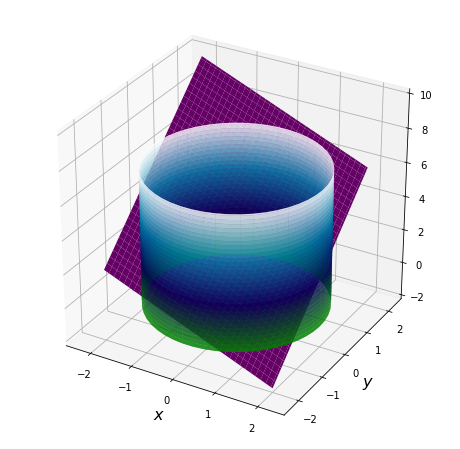

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = y = np.linspace(-1,1,101)
x,y = np.meshgrid(x,y)
X = 2*cos(2*pi*x)
Y = 2*sin(2*pi*x)
Z = 4*y+3
ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean');
X = 2*x
Y = 2*y
Z = 4-X+2*Y
ax.plot_surface(X,Y,Z,alpha=1,color='purple')
for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2.5,2.5]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
ax.set_zlim=([0,8])

# Calculus of Vector-Valued Functions

## Limits

Let $\vec r (t) = \langle x(t),y(t),z(t) \rangle$ then the definition of a limit looks nearly identical to that for scalar-valued funtions. $$\lim_{t \to a} \vec r(t) = \vec L $$ if $|\vec r(t) - \vec L|$ gets arbitrarily small as $t$ approaches $a$.

In other words, $$\lim_{t \to a} \vec r(t) = \bv{\lim_{t \to a} x(t) \\\lim_{t \to a} y(t) \\ \lim_{t \to a} z(t) }$$ where the LHS exists if and only if all limits on the RHS exist.

## Derivatives

A similar story happens when we try to import the definition of a derivative to this context. $$\vec r'(t) = \lim_{h \to 0} \frac{\vec r(t+h) - \vec r(t)}{h} $$

$$ = \bv{x'(t) \\ y'(t) \\ z'(t)}$$

... but the geometric view is actually interesting...

### Example

Consider the curve $\vec r(t) = \langle -t \cos t, t \sin t \rangle $ in the plane for $t \in [0,2\pi]$. 
  - Compute $\vec r'(\pi/2)$. 
  - Draw several "values" of the difference quotient in the limit definition of the derivative. 
  - Interpret the derivative as a vector. 

In [6]:
r = lambda t: np.array([- t*cos(t),t*sin(t)])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),t])
r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact(h=(-1,1,.05))
def _(h=1):
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    s = np.linspace(0,pi,300)
    ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot(X,Y,alpha=1,lw=3);
    ax.plot([-1,pi],[0,0],'k')
    ax.plot([0,0],[0,pi],'k')
    v = r(pi/2+h)-r(pi/2)
    ax.quiver([0,0],[pi/2,pi/2],[v[0],h == 0 and pi/2 or v[0]/h ],[v[1],h == 0 and 1 or v[1]/h],angles='xy', scale_units='xy', scale=1)

interactive(children=(FloatSlider(value=1.0, description='h', max=1.0, min=-1.0, step=0.05), Output()), _dom_c…

#### Quick exercise

What is the derivative of the parametrized line $$\vec r(t) = \vec p + t \vec v ?$$

## Properties of the derivative

$$\frac{d}{dt} (c\vec r(t)) = c \vec r'(t)$$

$$\frac{d}{dt} (\vec q(t) + \vec r(t)) = \vec q'(t) + \vec r'(t)$$

$$\frac{d}{dt} (f(t) \vec r(t)) = f'(t)\vec r(t) +  f(t) \vec r'(t)$$

$$\frac{d}{dt} (\vec q(t) \cdot \vec r(t)) = \vec q'(t)\cdot\vec r(t) + \vec q(t) \cdot \vec r'(t)$$

$$\frac{d}{dt} (\vec q(t) \times \vec r(t)) = \vec q'(t)\times\vec r(t) + \vec q(t) \times \vec r'(t)$$

$$\frac{d}{dt} \vec r(f(t)) =  f'(t)\vec r'(f(t))$$

## Example

Let $\vec r(t)$ be a differentiable curve restricted to the surface of the sphere $x^2 + y^2 +z^2 = 16$. Show that the tangent vector and the position vector are orthogonal at each input $t$.  

## Smoothness

A differentiable curve $\vec r (t)$ is said to be **smooth** provided for all $t$, $|\vec r'(t)| \neq 0$.


For such surves we define the **unit tangent vector** $$T(t) = \frac{\vec r'(t)}{|\vec r'(t)|}.$$

In [7]:
r = lambda t: np.array([t**2,t**3])
dr = lambda t: np.array([2*t,3*t**2])


@interact
def _(h=(-1,1,.05)):
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    s = np.linspace(-1,1,300)
    ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot(X,Y,alpha=1,lw=3);
    ax.plot([-1,1],[0,0],'k')
    ax.plot([0,0],[-1,1],'k')
    ax.set_title("Differentiable but not smooth")
    v = r(h)-r(0)
    ax.quiver(r(h)[0],r(h)[1],h!=0 and dr(h)[0]/np.linalg.norm(dr(h)) or 0,h!=0 and dr(h)[1]/np.linalg.norm(dr(h)) or 0,angles='xy', scale_units='xy', scale=1)

interactive(children=(FloatSlider(value=0.0, description='h', max=1.0, min=-1.0, step=0.05), Output()), _dom_c…

## Integration

Integrals are limits of sums. Vectors can be added and scaled, so this definition also goes right through, though the interpretation is less clear.

$$\int_a^b \vec r(t)\,dt = \lim_{N\to\infty} \sum_{i=1}^N \vec r(t_i^*) \,\Delta t$$

$$ = \left\langle \int_a^b x(t)\,dt, \int_a^b y(t)\,dt ,\int_a^b z(t)\,dt \right\rangle$$ in components. 

## Fundamental Theorem

$$\vec r(t) = \vec r(a) + \int_a^t \vec r'(\tau)\,d\tau$$  

# Arc Length

Most have an intuition for what is meant by the length of a curving path. But carefully formulating it gives rise rather quickly to a fundamental formula.

In [8]:
r = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),sin(6*pi*t)])

@interact(n=(1,100,3))
def _(n=4,angle=(-30,120,6)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(-1,1,300)
    ax.view_init(30, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y,Z = np.column_stack([r(x) for x in s])
    ax.plot(X,Y,Z,alpha=1,lw=3);
    s = np.linspace(0,1,n+1)
    X,Y,Z = np.column_stack([r(x) for x in s])
    ax.plot(X,Y,Z,alpha=1,lw=3);
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')


interactive(children=(IntSlider(value=4, description='n', min=1, step=3), IntSlider(value=42, description='ang…

## Arc Length

So a reasonable approximation is 

$$\sum_{i=1}^n |\vec r(t + i \Delta t) - \vec r(t+(i-1)\Delta t)|$$ 

$$ = \sum_{i=1}^n \left|\frac{\vec r(t + i \Delta t) - \vec r(t+(i-1)\Delta t)}{\Delta t}\right| \Delta t $$ since $\Delta t >0$.

$$ \longrightarrow \int_a^b |\vec r'(t)|\,dt$$

We explore this more next time.